<a href="https://colab.research.google.com/github/KhurramDevOps/Quarter-02/blob/master/Langchain_Project_no_1_Prompt_templatesipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LangChain and Google Gemini Flash 2.0 Integration**

In [1]:
from google.colab import userdata
GOOGLE_API_KEY = userdata.get('GEMINI_API_KEY')

In [2]:
!pip install --upgrade --quiet langchain_google_genai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 3.8 MB/s eta 0:00:00


# **1. Defining Prompt Templates**

In [3]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.prompts import PromptTemplate
from IPython.display import Markdown, display

In [4]:
# Define the first Prompt Template
first_prompt = PromptTemplate(
    input_variables = ["question"],
    template="""
Provide a detailed explanation of the topic: "{question}".

The explanation should:
- Be clear and easy to understand for a general audience.
- Include relevant examples or applications, if possible.
- Avoid unnecessary jargon while maintaining accuracy
    """
)

# Define the second prompt Template
second_prompt = PromptTemplate(
    input_variables = ["first_response"],
    template="""
Based on the following response: "{first_response}", create a detailed markdown explanation.

The markdown explanation should include:
# Introduction
A brief overview of the topic.

## Key Concepts
Main ideas or points related to the topic.

## In-depth Analysis
A deeper exploration of critical subtopics or concepts.

## Examples or Applications
Relevant real-world examples, applications, or scenarios.

## Conclusion
A summary that reinforces the key takeaways.
"""
)

# Define the third Prompt Template
third_prompt = PromptTemplate(
    input_variables = ["second_response"],
    template="""
Convert the following detailed explanation into a well-structured image generation prompt:
{second_response}

The image generation prompt should:
- Be specific, vivid, and descriptive.
- Highlight key visual elements, styles, or themes.
- Provide sufficient details to create a realistic or artistic image.
- Avoid ambiguity to ensure accurate image generation.
"""
)

# **2. Configuring ChatGoogleGenerativeAI model**

In [27]:
# Configure the ChatGoogleGenerativeAI model
llm = ChatGoogleGenerativeAI(
    api_key=GOOGLE_API_KEY,
    temperature=0.4,
    model="gemini-2.0-flash-exp",
)

llm2 = ChatGoogleGenerativeAI(
    api_key=GOOGLE_API_KEY,
    temperature=0.6,
    model="gemini-2.0-flash-exp",
    max_output_tokens=1000,
)

llm3 = ChatGoogleGenerativeAI(
    api_key=GOOGLE_API_KEY,
    temperature=0.7,
    model="gemini-2.0-flash-exp",
    max_output_tokens=150,
)


# **3. Creating Chains and getting Responses**

In [28]:
# Creating Chains for the prompts
first_chain = first_prompt | llm
second_chain = second_prompt | llm2
third_chain = third_prompt | llm3

In [32]:
# Get the first response
text = "Agentic AI"
first_response :str = first_chain.invoke({"question": text})
print("\n\n\nFirst chain:\n\n")
display(Markdown(first_response.content))

# Get the second response
second_response:str = second_chain.invoke({"first_response": first_response.content})
print("\n\n\nSecond chain:\n\n")
display(Markdown(second_response.content))

# Get the third response
third_response:str = third_chain.invoke({"second_response": second_response.content})
print("\n\n\nThird chain:\n\n")
display(Markdown(third_response.content))




First chain:




Okay, let's dive into "Agentic AI" and break it down in a way that's easy to grasp.

**What is Agentic AI?**

Imagine a helpful assistant, but instead of just following your instructions step-by-step, it can think for itself, plan, and take actions to achieve a goal you've given it. That's essentially what Agentic AI is all about.

At its core, **Agentic AI refers to artificial intelligence systems that can act autonomously to achieve a specific objective.** Unlike traditional AI, which often requires very specific instructions for each task, Agentic AI can:

* **Understand a high-level goal:** You might tell it, "Plan a surprise birthday party for my friend," rather than "Go to this website, find a cake, add it to the cart..."
* **Plan and strategize:** It can break down the goal into smaller steps, figure out the order of operations, and adapt its plan as it goes.
* **Take actions:** It can interact with the real world (or digital world) by searching the internet, sending emails, using tools, and making decisions.
* **Learn and adapt:** It can analyze the results of its actions and adjust its approach to improve its performance over time.

Think of it as giving an AI a mission, and then letting it figure out the best way to accomplish that mission, rather than micro-managing every single step.

**Key Differences from Traditional AI:**

Traditional AI, like image recognition or language translation, is often *reactive*. It responds to a specific input with a specific output. Agentic AI, on the other hand, is *proactive*. It takes the initiative to achieve a goal.

Here's a simple analogy:

* **Traditional AI:** Like a calculator. You give it numbers and an operation, and it gives you the answer.
* **Agentic AI:** Like a personal chef. You tell them you want a delicious dinner, and they figure out the menu, shop for ingredients, and cook the meal.

**Key Characteristics of Agentic AI:**

* **Autonomy:** The ability to act independently without constant human intervention.
* **Goal-Oriented:** Driven by a specific objective or task.
* **Planning & Reasoning:** Can break down complex tasks into smaller, manageable steps.
* **Interaction:** Can interact with the environment (digital or physical) to gather information and take actions.
* **Learning & Adaptation:** Can improve its performance over time based on experience.

**Examples and Applications of Agentic AI:**

The field of Agentic AI is still relatively new, but it's rapidly evolving. Here are some examples of how it's being used or could be used:

* **Personal Assistants:** Imagine an AI assistant that doesn't just schedule appointments but also anticipates your needs, proactively researches travel options, and even manages your finances.
* **Autonomous Research:** An AI that can independently explore a scientific question, gather data from various sources, analyze the information, and even formulate new hypotheses.
* **Content Creation:** An AI that can generate original articles, stories, or even music based on a high-level prompt.
* **Robotics:** Robots that can navigate complex environments, perform tasks without explicit programming, and adapt to unexpected situations.
* **Supply Chain Management:** AI agents that can optimize logistics, predict demand, and manage inventory autonomously.
* **Cybersecurity:** AI agents that can detect and respond to threats in real-time, without human intervention.
* **Game Playing:** AI agents that can learn to play complex games like Go or Starcraft at a superhuman level.

**Why is Agentic AI Important?**

Agentic AI has the potential to revolutionize many aspects of our lives because it can:

* **Automate complex tasks:** freeing up human time and resources for more creative and strategic work.
* **Solve problems more efficiently:** by using its ability to plan, reason, and adapt.
* **Make better decisions:** by analyzing vast amounts of data and identifying patterns that humans might miss.
* **Personalize experiences:** by understanding individual needs and preferences.

**Challenges and Considerations:**

While the potential of Agentic AI is immense, there are also challenges and considerations:

* **Ethical Concerns:** Ensuring that AI agents act in a responsible and ethical manner is crucial.
* **Safety:** We need to ensure that AI agents do not cause harm, either intentionally or unintentionally.
* **Control:** How do we maintain control over AI agents as they become more autonomous?
* **Bias:** AI models can inherit biases from the data they are trained on, leading to unfair or discriminatory outcomes.

**In Conclusion:**

Agentic AI represents a significant leap forward in the field of artificial intelligence. It moves beyond reactive systems to create proactive, autonomous agents that can solve complex problems and achieve goals with minimal human intervention. While still in its early stages, Agentic AI has the potential to transform industries and reshape our relationship with technology. As this field continues to develop, it's important to address the ethical, safety, and control challenges to ensure that this powerful technology is used for the benefit of humanity.





Second chain:




```markdown
# Introduction

This document provides a detailed explanation of Agentic AI, a rapidly evolving field within artificial intelligence. Agentic AI represents a shift from traditional reactive AI systems to proactive, autonomous agents capable of planning, strategizing, and acting to achieve specific goals. This explanation will break down the core concepts, explore key differences from traditional AI, examine real-world applications, and discuss the associated challenges and considerations.

## Key Concepts

* **Autonomy:** Agentic AI systems possess the ability to act independently without constant human intervention. They are not simply following pre-programmed steps, but rather making decisions based on their understanding of a given objective.
* **Goal-Oriented:** These systems are driven by a specific objective or task, which they strive to achieve through their actions. The goal provides the direction for their planning and execution.
* **Planning & Reasoning:** Agentic AI is capable of breaking down complex tasks into smaller, manageable steps. They can formulate plans, reason about the order of operations, and adapt their strategies as needed.
* **Interaction:** These AI agents can interact with their environment, whether it's the digital world or the physical world. They can gather information, use tools, and take actions to achieve their goals.
* **Learning & Adaptation:** Agentic AI can learn from experience. They analyze the results of their actions and adjust their approach to improve their performance over time, making them more effective and efficient.

## In-depth Analysis

### Agentic AI vs. Traditional AI

The fundamental difference between Agentic AI and traditional AI lies in their approach to tasks. Traditional AI is largely *reactive*. It responds to a specific input with a specific output, much like a calculator. For example, an image recognition AI identifies objects in an image based on its training data.

Agentic AI, on the other hand, is *proactive*. It takes the initiative to achieve a goal. Instead of being given specific instructions for each step, it is provided with a high-level objective and then figures out the best way to accomplish it. This involves planning, strategizing, and taking actions autonomously.

The analogy of a calculator (traditional AI) versus a personal chef (Agentic AI) effectively illustrates this difference. A calculator performs specific operations given to it, while a chef takes a high-level request (a delicious dinner) and handles all the steps involved, from menu planning to cooking.

### Key Characteristics Explained

*   **Autonomy:** This is not about AI "going rogue," but rather about the AI having the capacity to make decisions and take actions without needing a human to constantly tell it what to do at every step.
*   **Goal-Oriented:** The goal provides the framework for all actions. The AI is not operating without purpose; it is actively working towards a defined outcome.
*   **Planning & Reasoning:** This involves complex cognitive processes such as breaking down large tasks into smaller steps, prioritizing actions, and adapting plans based on new information or obstacles.
*   **Interaction:** This can range from searching the internet to manipulating physical objects. The ability to interact with the environment is crucial for gathering information and taking actions.
*   **Learning & Adaptation:** This is essential for continuous improvement. The AI learns from its successes and failures and adjusts its strategies to become more effective over time.

## Examples or Applications

The applications of Agentic AI are vast and continuously expanding. Here are some notable examples:

*   **Personal Assistants:** Beyond scheduling, these assistants could proactively manage finances, research travel options based on preferences, and anticipate needs.
*   **Autonomous Research:** AI agents can independently explore scientific questions, gather data from various sources, analyze the information, and even formulate new hypotheses, accelerating the research process.
*   **Content Creation:** Agentic AI can generate original articles, stories, music, or other creative content, moving beyond simply summarizing existing information.
*   **Robotics:** Robots can navigate complex environments, perform tasks without explicit programming, and adapt to unexpected situations, enabling them to work in dynamic and unpredictable settings.
*   **Supply Chain Management:** AI agents can optimize logistics, predict demand, and manage inventory autonomously, leading to more efficient and cost-effective operations.
*   **Cybersecurity:** Agentic AI can detect and respond to threats in real-time, without human intervention, providing a more robust defense against cyberattacks.
*   **Game Playing:** AI agents can learn to play complex games like Go or Starcraft at a superhuman level, showcasing their ability to strategize and adapt to complex scenarios.

## Conclusion

Agentic AI represents a significant paradigm shift in the field of artificial intelligence. By moving away from reactive systems to proactive, autonomous agents, it opens up new possibilities for automation, problem-solving, and personalized experiences. While the technology is still in its early stages of




Third chain:




Okay, here's a well-structured image generation prompt based on the provided text, aiming for a visually engaging and informative representation of Agentic AI:

**Prompt:**

A futuristic, vibrant illustration depicting the concept of Agentic AI. In the center, visualize a stylized, glowing AI core or brain, composed of interconnected networks of light, pulsating with energy. Radiating outwards from this core are multiple interconnected pathways, each leading to different visual representations of Agentic AI applications.

These pathways should showcase the following:

*   **Personal Assistant:** A holographic, friendly-looking AI assistant interface interacting with a user, displaying a calendar, travel plans, and financial data, with a subtle background of a bustling city.
*   **

In [30]:
from diffusers import StableDiffusionPipeline
import torch

# Load the Stable Diffusion v1.5 pipeline
pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",  # Lightweight and optimized
    torch_dtype=torch.float16  # Use half-precision for reduced memory usage
)

# Move to GPU
pipe.to("cuda")

# Enable memory-efficient attention
pipe.enable_attention_slicing()  # Reduce attention memory footprint
  # Efficient attention (if supported)

# Generate the image at a moderate resolution
image = pipe(third_response.content, height=512, width=512).images[0]

# Save the image
image.save("optimized_image.png")
print("Image generated and saved as 'optimized_image.png'")


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (155 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["active feel . these pathways should pulse with light , suggesting the flow of information and autonomous decision - making . within this network , visualize several distinct ' agent ' icons . these agents should be represented as sleek , abstract humanoid figures , each with a unique visual identifier – perhaps a different color aura or a subtle geometric pattern . they should appear to be actively moving along the pathways , suggesting"]


  0%|          | 0/50 [00:00<?, ?it/s]

Image generated and saved as 'optimized_image.png'


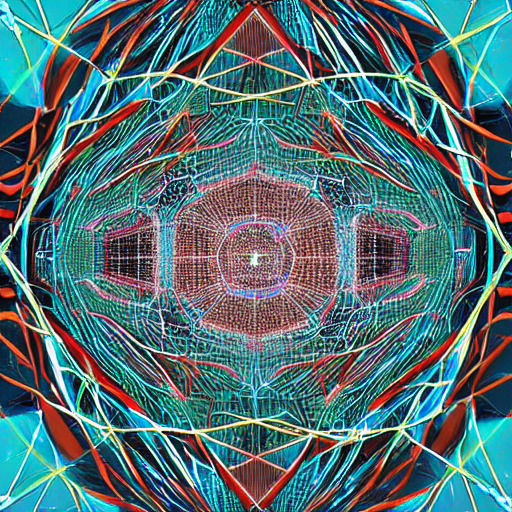

In [31]:
image